<a href="https://colab.research.google.com/github/jeromy0307/jeromy0307.github.io/blob/master/mysympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 計算機概論期末報告範本
(2016/12/08 修正 python 3 range 函數部分)
(2023/5/12 改成Colab)

使用Colab製作期末報告內容需包含 
* 以matplotlib繪圖(三個函數)
* 使用sympy解決微積分課本中的三種類型題目：極限、微分、積分；每種類型請各做三個例題。
* 使用sympy計算某函數的微分，接著再使用 lambdify 將其定義為函數，同時以matplotlib畫出原函數與其微分的函數圖形
* 請貼上個人照片
* 繳交時請繳交ipynb檔以及轉換的pdf檔


# 成功大學數學系 xxx 學號

![成功大學數學系xxx學號](https://github.com/minhung/MyPythonNote/blob/master/MagicConch.jpg?raw=1)

為了方便我打平時分數請附上你的個人相片（這樣我比較有印象），貼圖的方法可以把上一個雙擊上一個cell編輯就可以了解貼圖語法。

上個cell裡的程式碼是 ![成功大學數學系xxx學號] (MagicConch.jpg) (注意前面的中括弧和小括弧間沒有空白)。

圖可以放在雲端空間，但是必須可以分享。MagicConch.jpg是圖的檔名，除了jpg檔外，也可以用其他常見的圖檔。。

上面的做法無法自由調整圖片大小，所以如果圖太大的話，可以使用其他軟體編輯圖片大小，或是使用以下方式貼圖。


<img src="https://github.com/minhung/MyPythonNote/blob/master/MagicConch.jpg?raw=1" width="25%">

報告中的程式碼或是說明不需要鉅細靡遺，原則上能作到日後需要使用這些功能時看這篇說明就可以使用，或是類似網路上一堆使用教學的網誌那就夠了。報告繳交時，除了相關檔案外(ipynb、圖檔)，請將你的ipynb檔另存為pdf檔繳交。

## 使用matplotlib畫圖

首先載入需要的相關模組

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, exp
#%matplotlib inline

準備數據 ... 假設我要畫 $\sin{e^x}$，$x_a \le x \le x_b$， 
註：上式的數學式子是使用latex語法打的，可以雙擊看到語法，底下可以看到其他類似例子


In [ ]:
NumP = 1000
x = list(range(0,NumP+1))
y = list(range(0,NumP+1))
xa = 0.0
xb = 10.0
dx = (xb-xa)/float(NumP)

注意底下的x[i]、y[i]的寫法，為了畫圖，我們在[xa,xb]取了NumP+1個點(包含兩個端點)，在上面的cell裡，我們計算了分割大小(dx)，然後在底下以loop的方式產生x[i]以及函數在該點的值y[i]。

In [ ]:
for i in list(range(NumP+1)):
    x[i] = xa+dx*float(i)
    y[i]=sin(exp(x[i]))

不過上述的程式不是好的寫法，比較好的做法是使用numpy的array，請參考以下的寫法

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, exp
NumP = 10
xa = 0.0
xb = 10.0
dx = (xb-xa)/(NumP)
x = np.linspace(xa,xb,NumP+1)
y = np.sin(np.exp(x))
print(dx)
print(x)

1.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


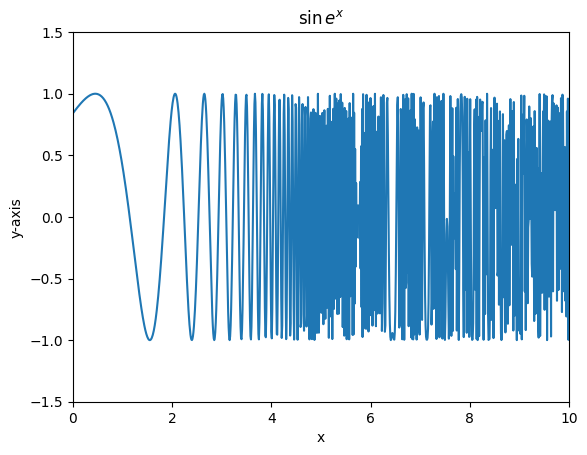

In [ ]:
# 開始畫圖

    # 設定要畫的的x,y數據list....

plt.plot(x,y) 
    # 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(0,10)
plt.ylim(-1.5,1.5)
    # 照需要寫入x 軸和y軸的 label 以及title

plt.xlabel("x") 
plt.ylabel("y-axis") 
plt.title("$\sin{e^x}$") 
    # 在這個指令之前，都還在做畫圖的動作 
    # 這個指令算是 "秀圖" 
plt.show() 

### xkcd
Note: 這個小節(xkcd)只是讓你的圖變得有趣，不需要加入你的報告

如果想要有趣的圖，可以採用xkcd手繪卡通圖模式

* [Python matplotlib xkcd 手繪卡通圖模式教學與範例](https://note.nkmk.me/en/python-range-usage/#:~:text=In%20Python%203%2C%20range()%20creates%20an%20object%20of%20range%20type.&text=An%20object%20of%20range%20type%20does%20not%20store%20values%2C%20but,printed%20in%20the%20for%20loop.&text=If%20you%20want%20to%20generate%20a%20list%2C%20use%20list()%20.)
* [https://xkcd.com/](https://xkcd.com/)


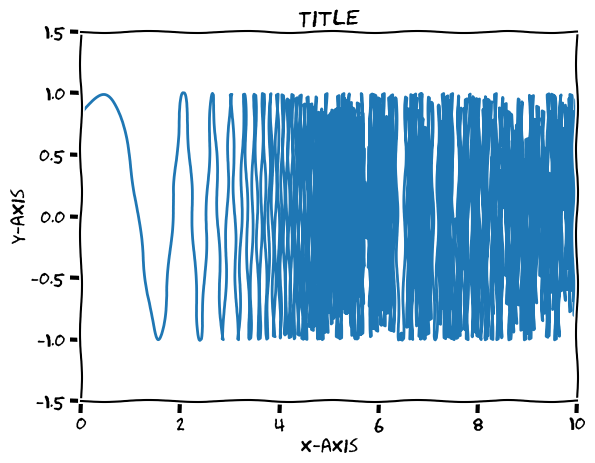

In [ ]:
with plt.xkcd():
  for i in list(range(NumP+1)):
    x[i] = xa+dx*float(i)
    y[i]=sin(exp(x[i]))

  # 開始畫圖

    # 設定要畫的的x,y數據list....

  plt.plot(x,y) 
    # 設定圖的範圍, 不設的話，系統會自行決定
  plt.xlim(0,10)
  plt.ylim(-1.5,1.5)
    # 照需要寫入x 軸和y軸的 label 以及title

  plt.xlabel("x-axis") 
  plt.ylabel("y-axis") 
  plt.title("Title") 
    # 在這個指令之前，都還在做畫圖的動作 
    # 這個指令算是 "秀圖" 
  plt.show() 


## 使用sympy計算極限

<strike>底下我們將是著引入可以讓結果比較漂亮的模組(printing)，由於每一台電腦安裝的程式都有些許不同，所以不見得可以引入</strike>


In [ ]:
#import pkg_resources
#if pkg_resources.get_distribution("sympy").version > "0.7.4":
#    from sympy.interactive import printing
#    printing.init_printing(use_latex=True)
#
#from IPython.display import display

底下的例子是計算$\lim_{x \to 0} \frac{\sin{x}}{x}$
由於我們要計算limit、sin所以我們需要由sympy(符號計算)引入相關函數，同時需要宣告x是一個符號變數

In [ ]:
from sympy import limit, Symbol, sin, oo
x = Symbol('x')
limit(sin(x)/x, x, 0)

1

$\lim_{x \to \infty} \frac{\sin{x}}{x}$

In [ ]:
limit(sin(x)/x, x, oo)

0

## 使用sympy計算積分

底下的例子是計算$\int x\sin{x^2}\, dx$，由於前面已經引入 sin 同時也將x 宣告為一個symbol，所以我們這邊只需要再引入integrate

In [ ]:
 from sympy import integrate
 integrate(x*sin(x**2), x)

-cos(x**2)/2

$$\int_0^1 x\, dx$$

In [ ]:
integrate(x,(x,0,1))

1/2

## 使用sympy計算微分

底下的例子是計算$\frac{d}{dx} \sin{x}$，由於前面已經引入 sin 同時也將x 宣告為一個symbol，所以我們這邊只需要再引入diff

In [ ]:
from sympy import diff
diff(sin(x), x)

cos(x)

$\frac{d^2}{dx^2} \sin{x}$

In [ ]:
diff(sin(x), x,2)

-sin(x)

In [ ]:
diff(sin(x), x,x)

-sin(x)

## 補充資料：Latex

上面內容中，除了ipython的輸出外，有時候你會看到數學式混雜在文字敘述中，如果你把該cell改成 Raw NBConvert 會發現有些式子在$ $中，那些式子是latex的寫法。latex是常用來打數學方程是的一種軟體，但是要整篇文章都用latex打，需要時間熟悉用法。在ipython notebook或是markdown裡，允許我們在文字中使用latex語法打數學式，比方說("$" 前的"*"是讓markdown以條列式方式表示)

* $\sum_{i=1}^n a_i=0$

* $f(x)=x^{x^x}$

* $\frac{du}{dt}$ and $\frac{d^2 u}{dx^2}$

* $\lim_{x \to 0} \frac{3x^2 +7x^3}{x^2 +5x^4} = 3.$

* $\int_a^b f(x)\,dx.$

* $\int_0^{+\infty} x^n e^{-x} \,dx = n!.$ 

* $\int \cos \theta \,d\theta = \sin \theta.$

* $\int_{x^2 + y^2 \leq R^2} f(x,y)\,dx\,dy = \int_{\theta=0}^{2\pi} \int_{r=0} ^R f(r\cos\theta,r\sin\theta) r\,dr\,d\theta.$

* $$ \int_{x^2 + y^2 \leq R^2} f(x,y)\,dx\,dy = \int_{\theta=0}^{2\pi} \int_{r=0} ^R f(r\cos\theta,r\sin\theta) r\,dr\,d\theta.$$

最後一個例子我是用"$$"夾起整個式子，這在latex裡是表示這個式子要獨占一行置中，同時顯示的格式會比較漂亮。

請注意"$"和你的式子間不要有空白

如果你想把報告打漂亮一點，可以試著使用latex

## 參考資料：

底下是一些參考資料，網路上還有非常多資料可以使用(用星號可以條列式顯示，各項間請空一行之後在轉換成pdf檔時才不會擠在一起)

* [LaTeX技巧10：LaTeX數學公式輸入初級入門](http://blog.sina.com.cn/s/blog_5e16f1770100fs38.html)

* [Markdown的用法](http://markdown.tw/)

* [炎龍老師的blogIPython 的 Notebook 界面](http://yenlungblog.wordpress.com/2013/11/21/python-ipython-%E7%9A%84-notebook-%E7%95%8C%E9%9D%A2/)

* [用python 畫圖 -- matplotlib -- 騙錢教學](http://onionys.blogspot.tw/2012/01/python-matplotlib.html)

* [SymPy -- 使用 Python 幫你導煩人的數學公式（三）](http://www.gtwang.org/2012/12/sympy3.html)